In [44]:
from sklearn.manifold import MDS, SpectralEmbedding, TSNE, LocallyLinearEmbedding
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
def dr(X, method="MDS"):
    if method == "MDS":
        embedding = MDS(n_components=2)
    elif method == "spectral":
        embedding = SpectralEmbedding(n_components=2)
    elif method == "tsne":
        embedding = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
    elif method == "locallylinear":
        embedding = LocallyLinearEmbedding(n_components=2)
    elif method == "pca":
        embedding = PCA(n_components=2)
    elif method == "kernelpca":
        embedding = KernelPCA(n_components=2, kernel='sigmoid')
    X_transformed = embedding.fit_transform(X)
    return X_transformed

def plot(XY):
    plt.figure(figsize=(8, 6))
    plt.scatter(XY[:, 0], XY[:, 1])
    plt.title('Scatterplot')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()


(613, 1536)


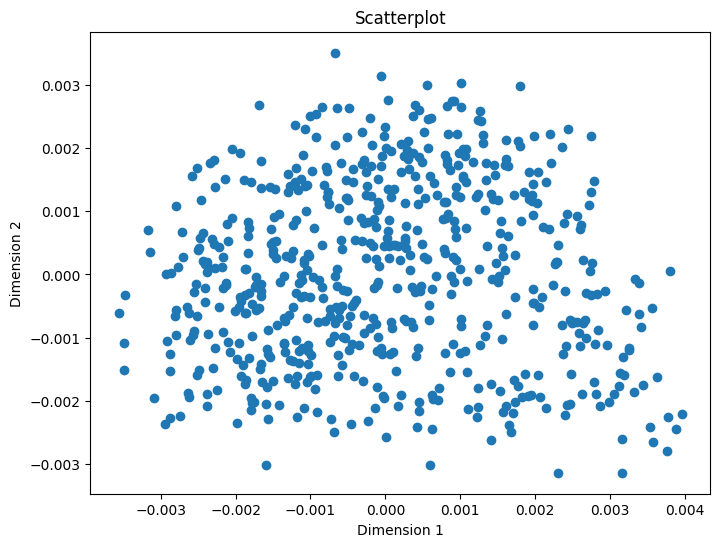

In [45]:
import json
from pprint import pprint
import numpy as np
dataset = json.load(open('../data/result/chunk_embeddings/all.json'))
data_embeddings = [data['embedding'] for data in dataset.values()]
data_embeddings = [embedding for embedding in data_embeddings if embedding != 'No content' ]
data_embeddings = np.array(data_embeddings)
print(data_embeddings.shape)

dr_result = dr(data_embeddings, 'kernelpca')
plot(dr_result)